In [4]:
###   Importação de bibliotecas   ###

In [7]:
import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [4]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [8]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [9]:
###   Chamando a classe para o processo   ###
tree_reg = DecisionTreeRegressor()

In [34]:
###   Parâmetros a serem avalizados   ###

parametros = [{'max_depth':[10, 20, 30, 40, 50, 60, 64, 65, 66, 67, 68, 70] , 'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7], 'min_samples_split': 
              [1,3,5,7,9,10,11,12,13,14]}]

In [35]:
### Processo de validação cruzada (busca de parâmetros)   ###

resultados_analise_parametros = tsf.obter_parametros(tree_reg, parametros, X_treino,Y_treino)

In [36]:
###    Imprime a classe do modelo com os melhores parâmetros calculados   ###

resultados_analise_parametros.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=67, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=13, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [5]:
###   Treina o modelo com os melhores prâmetros   ###


tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=67, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=13, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
tree_reg.fit(X_treino,Y_treino)

DecisionTreeRegressor(criterion='mse', max_depth=67, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=13, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', tree_reg.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(tree_reg.predict(X_treino),Y_treino)))


 R^2: 
 0.9563715381994695 
 RMSE : 
 7.1452802306929035


In [40]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', tree_reg.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(tree_reg.predict(X_teste),Y_teste)))


 R^2: 
 0.8966413863039105 
 RMSE : 
 10.969901464823657


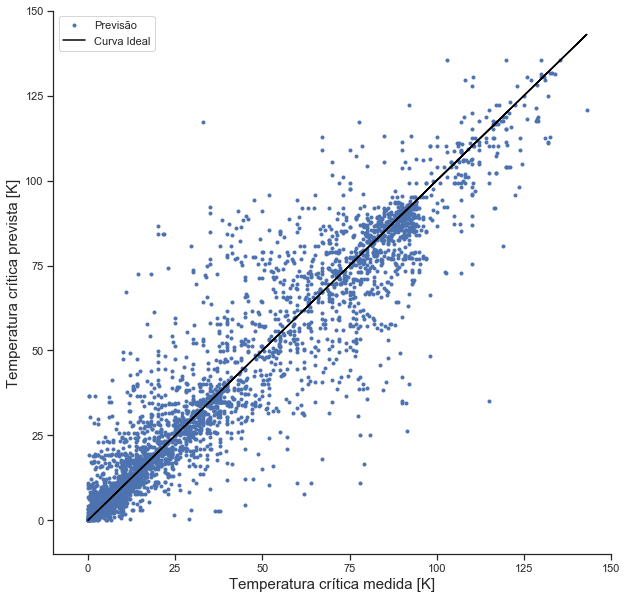

In [13]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

print_x = Y_teste
print_y = tree_reg.predict(X_teste)

f, ax = plt.subplots(figsize=(10, 10))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.show()